# Sales Analysis

### Import Necessary Libreries


In [1]:
import pandas as pd
import glob

#### Task 1: Merge the 12 months of sales data into a single CSV file

In [2]:
names=glob.glob("./SalesAnalysis/Sales_Data/*.csv")
all_months_data=pd.concat([pd.read_csv(file) for file in names], ignore_index=True)
all_months_data.to_csv("./SalesAnalysis/Output/all_data.csv",index=False)

#### Read in updated dataframe

In [3]:
all_data=pd.read_csv("./SalesAnalysis/Output/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Cleaning de data

In [4]:
all_data=all_data.dropna(subset=['Order ID'])
all_data = all_data[~all_data['Order ID'].str.contains('Order ID')]
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Task 2: Add Month Column

In [5]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add a sales column

In [6]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4: Add a city column.

In [7]:
all_data['City']=all_data['Purchase Address'].str.split(',').str[1]

#### Question 1: What was the best month for sales? How much was earned that month?

In [8]:
results=all_data.groupby('Month').sum()

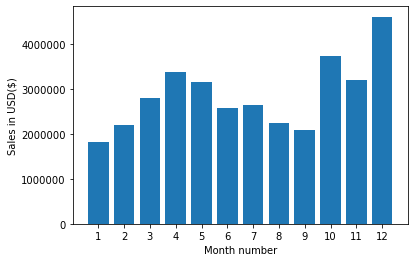

In [9]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


In [10]:
q1=results.sort_values(by='Sales', ascending=False).reset_index()
print("The month that had the best sales was "+ str(q1['Month'].iloc[0])+" and the sales were "+str(q1['Sales'].iloc[0]))

The month that had the best sales was 12 and the sales were 4613443.34


#### Question 2: What city had the highest number of sales?

In [11]:
results=all_data.groupby('City').sum().reset_index()

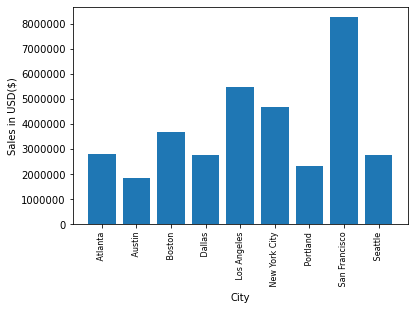

In [12]:
cities=all_data['City'].unique()
plt.bar(results['City'],results['Sales'])
plt.xticks(results['City'],rotation='vertical',size=8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False) 
plt.show()


In [13]:
q2=results.sort_values(by='Sales', ascending=False).reset_index()
print("The city that had the best sales was "+ str(q2['City'].iloc[0])+" and the sales were "+str(q2['Sales'].iloc[0]))


The city that had the best sales was  San Francisco and the sales were 8262203.91


#### Question 3: What time should we display advertisements to maximize likelihood of customer´s buying product?

In [14]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data['Hour']=all_data['Order Date'].dt.hour

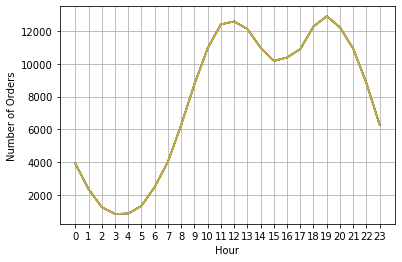

In [15]:
hours=[hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


Based on the graph, my recommendation is around 11am or 7pm

#### Question 4: What products are most often sold together?

In [19]:
q4=all_data[all_data['Order ID'].duplicated(keep=False)]
q4=q4.copy()
q4.loc[:, 'Grouped'] = q4.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
q4.head()




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [17]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in q4['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(1):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 2140


####  Question 5: What product sold the most? Why do you think it should the most?

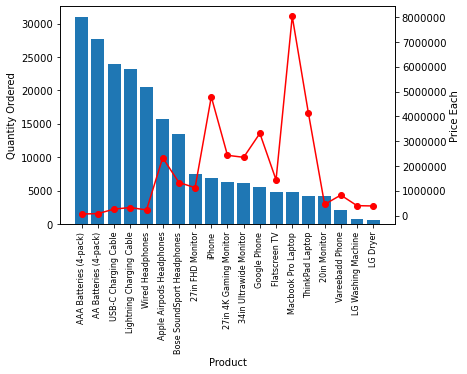

In [18]:
q5 = all_data.drop(['Hour', 'Month'], axis=1).groupby('Product').sum().reset_index().sort_values(by='Quantity Ordered', ascending=False)
Products = q5['Product'].unique()
fig, ax1 = plt.subplots()

ax1.bar(q5['Product'], q5['Quantity Ordered'])
ax1.set_xticks(q5['Product'])
ax1.set_xticklabels(q5['Product'], rotation='vertical', size=8)
ax1.set_ylabel('Quantity Ordered')
ax1.set_xlabel('Product')
ax1.get_yaxis().get_major_formatter().set_scientific(False)

ax2 = ax1.twinx()
ax2.plot(q5['Product'], q5['Price Each'], marker='o', linestyle='-', color='red')
ax2.set_ylabel('Price Each')
ax2.get_yaxis().get_major_formatter().set_scientific(False)

plt.show()



The best-selling product is AAA Batteries (4-pack), possibly due to its low cost and the various uses it has.